# Homework 3: Book Search

In [1]:
import glob
import numpy as np
from skimage import io, color
from skimage.feature import SIFT
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

1. Load each image and convert to grayscale.

In [2]:
paths = sorted(glob.glob('Childrens-Books/*.jpg'))

2. Extract SIFT features for each image.

In [3]:
total_descriptors = []
descriptor_list = []
for path in paths:
    image = io.imread(path)
    gray = color.rgb2gray(image)
    sift = SIFT()
    sift.detect_and_extract(gray)
    descriptors = sift.descriptors
    if descriptors is not None:
        descriptor_list.append(descriptors)
        total_descriptors.append(descriptors)

total_descriptors = np.vstack(total_descriptors)
print(f"Total descriptors: {total_descriptors.shape}")

Total descriptors: (387790, 128)


3. Cluster descriptors into 1000 visual words

In [4]:
clusters = 1000
kmeans = KMeans(n_clusters=clusters, random_state=42, verbose=1)

max_samples = 200000
if total_descriptors.shape[0] > max_samples:
    idx = np.random.choice(total_descriptors.shape[0], max_samples, replace=False)
    sample_descriptors = total_descriptors[idx]
else:
    sample_descriptors = total_descriptors

kmeans.fit(sample_descriptors)
visual_vocabulary = kmeans.cluster_centers_

Initialization complete
Iteration 0, inertia 19289660580.0.
Iteration 1, inertia 14071656143.23051.
Iteration 2, inertia 13793838925.978113.
Iteration 3, inertia 13673012780.156528.
Iteration 4, inertia 13602593760.412006.
Iteration 5, inertia 13555872096.62397.
Iteration 6, inertia 13522386117.960941.
Iteration 7, inertia 13496443788.043331.
Iteration 8, inertia 13476298768.477486.
Iteration 9, inertia 13459694046.672974.
Iteration 10, inertia 13446389234.387192.
Iteration 11, inertia 13435272293.215057.
Iteration 12, inertia 13425853567.064526.
Iteration 13, inertia 13417733100.431828.
Iteration 14, inertia 13410723325.941376.
Iteration 15, inertia 13404491349.156988.
Iteration 16, inertia 13399061479.912952.
Iteration 17, inertia 13394377552.086143.
Iteration 18, inertia 13390296404.534636.
Iteration 19, inertia 13386747017.910995.
Iteration 20, inertia 13383387390.295406.
Iteration 21, inertia 13380241387.445225.
Iteration 22, inertia 13377488325.015686.
Iteration 23, inertia 13374

4-5. Convert SIFT descriptors to cluster labels per image

In [5]:
docs = []
for path in paths:
    image = io.imread(path)
    gray = color.rgb2gray(image)
    sift = SIFT()
    sift.detect_and_extract(gray)
    desc = sift.descriptors
    if desc is None:
        labels = []
    else:
        labels = kmeans.predict(desc)
    # 5. convert labels list into a space-separated string document
    doc = ' '.join(map(str, labels.tolist()))
    docs.append(doc)

6. TF-IDF Vectorization

In [6]:
tfidf = TfidfVectorizer(token_pattern=r"\b\d+\b")
histograms = tfidf.fit_transform(docs)
print(f"TF-IDF matrix shape: {histograms.shape}")

TF-IDF matrix shape: (984, 1000)


7. Build k-NN model on histograms

In [7]:
nbrs = NearestNeighbors(metric='cosine', algorithm='brute')
nbrs.fit(histograms)

NearestNeighbors(algorithm='brute', metric='cosine')

Test Image Search:

8. Converting each image in queries to a document
9. Finding the 5 nearest neighbors in the dataset for each query
10. Plotting each query image next to its 5 nearest neighbors

In [8]:
queryPaths = sorted(glob.glob('queries/*.jpg'))

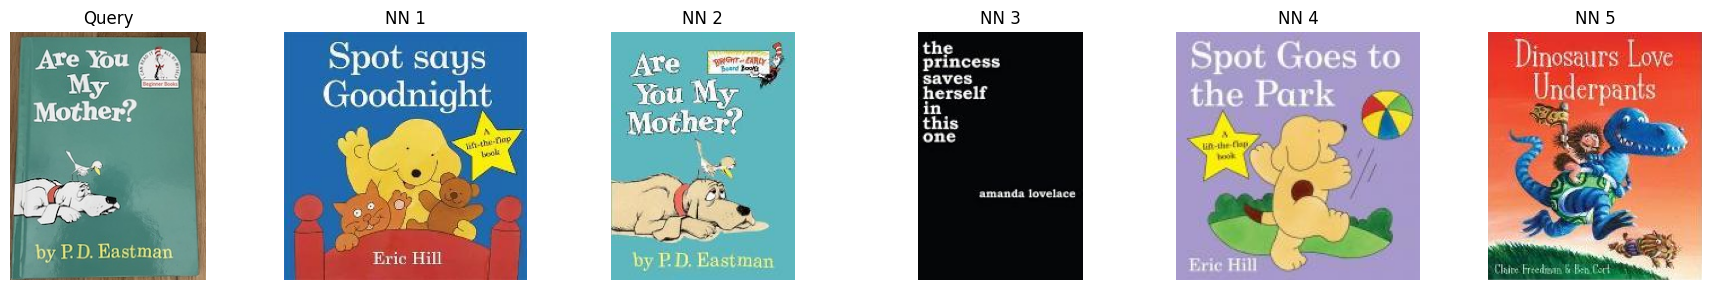

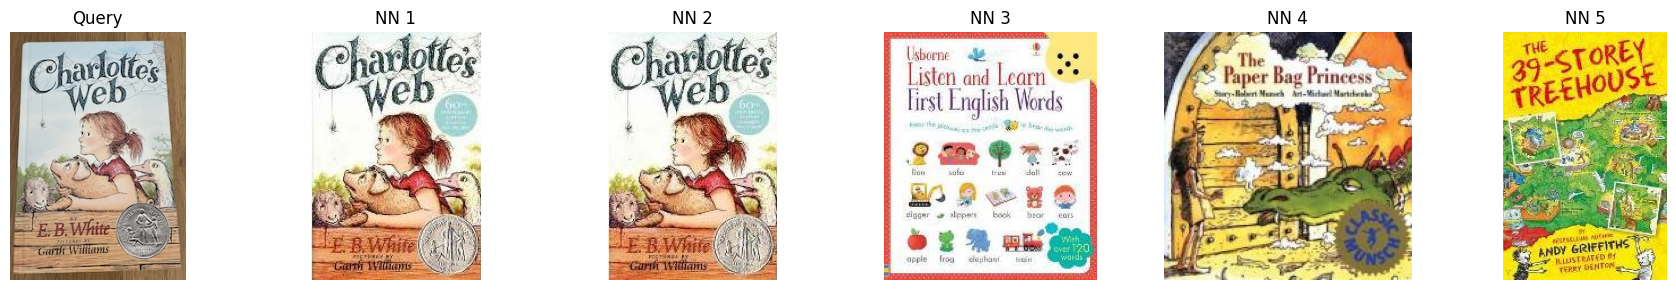

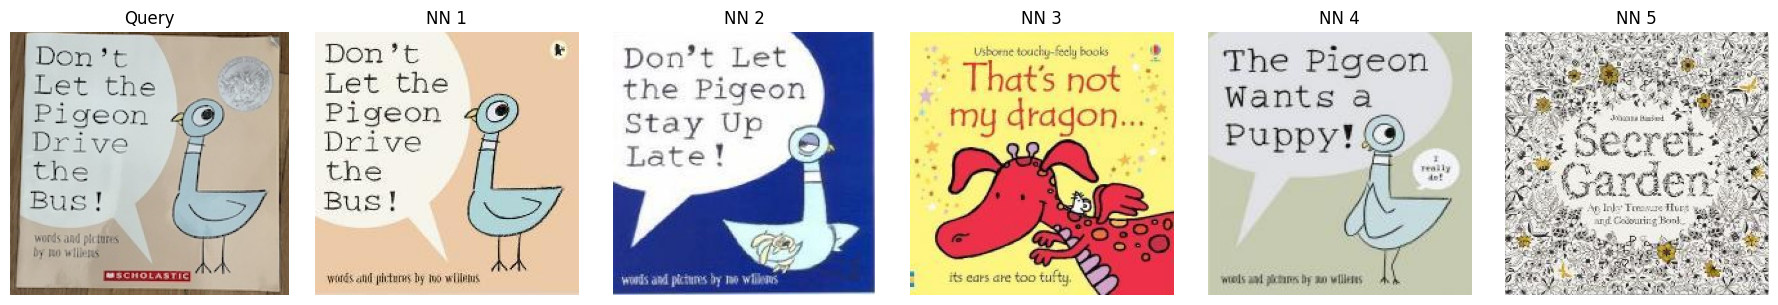

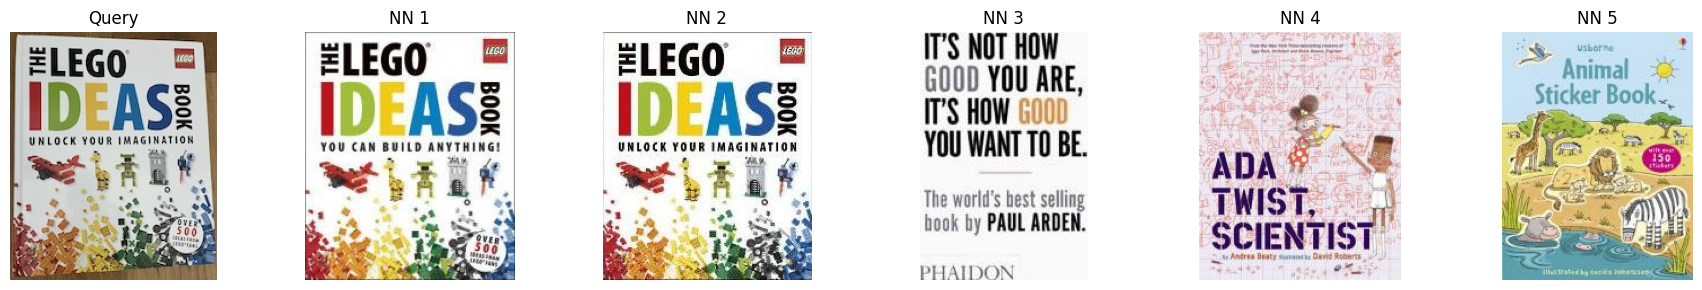

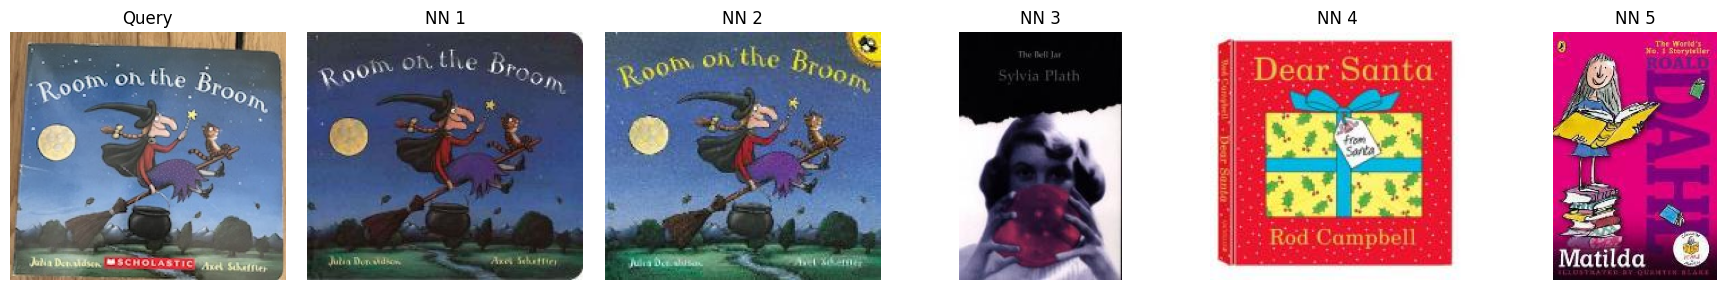

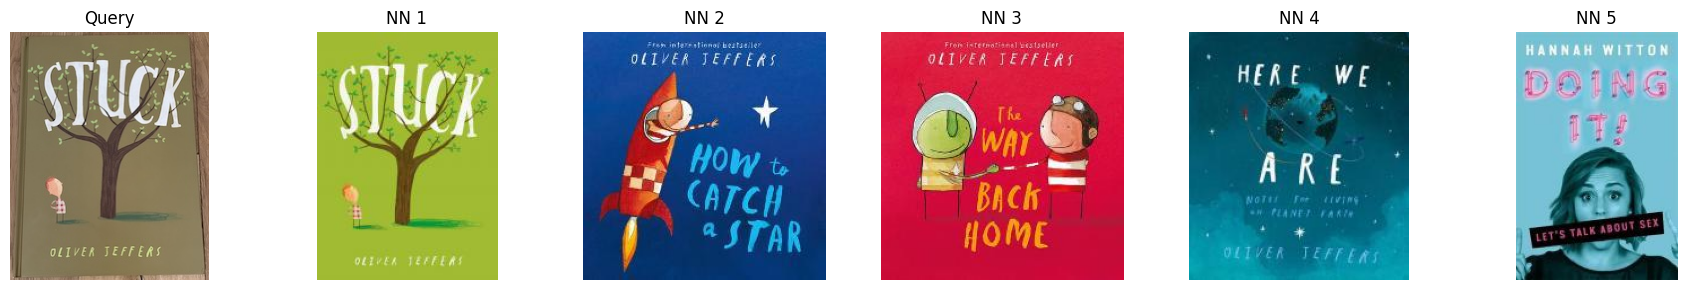

In [9]:
for qpath in queryPaths:
    # 8. Extract SIFT and convert to visual‐word “document”
    img = io.imread(qpath)
    gray = color.rgb2gray(img)
    sift = SIFT()
    sift.detect_and_extract(gray)
    desc = sift.descriptors
    labels = kmeans.predict(desc) if desc is not None else []
    q_doc = ' '.join(map(str, labels.tolist()))
    
    # 9. Vectorize and find five nearest neighbors
    q_hist = tfidf.transform([q_doc])
    distances, indices = nbrs.kneighbors(q_hist, n_neighbors=5)
    
    # 10. Plot query + its 5 nearest neighbors
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))
    axes[0].imshow(img); axes[0].axis('off'); axes[0].set_title('Query')
    for i, idx in enumerate(indices[0], start=1):
        nn_img = io.imread(paths[idx])
        axes[i].imshow(nn_img)
        axes[i].axis('off')
        axes[i].set_title(f'NN {i}')
    plt.tight_layout()
    plt.show()

For extra-queries folder:

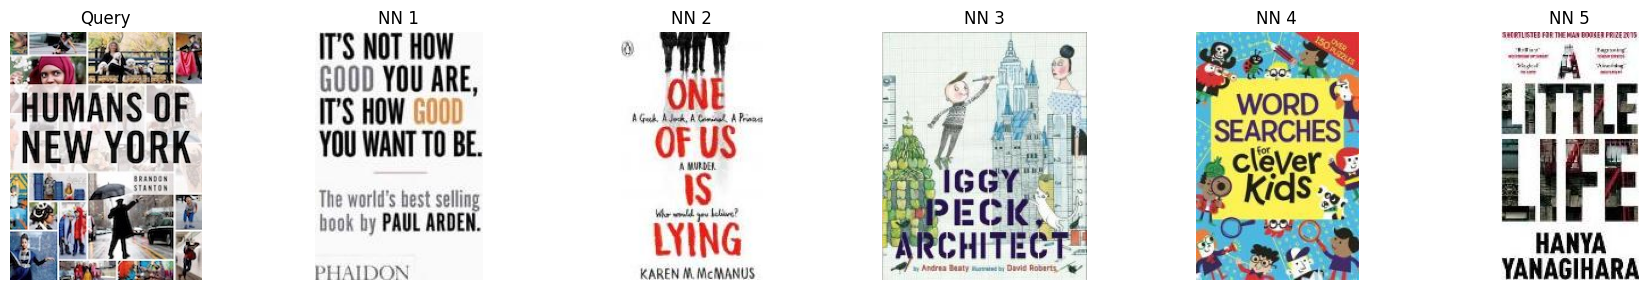

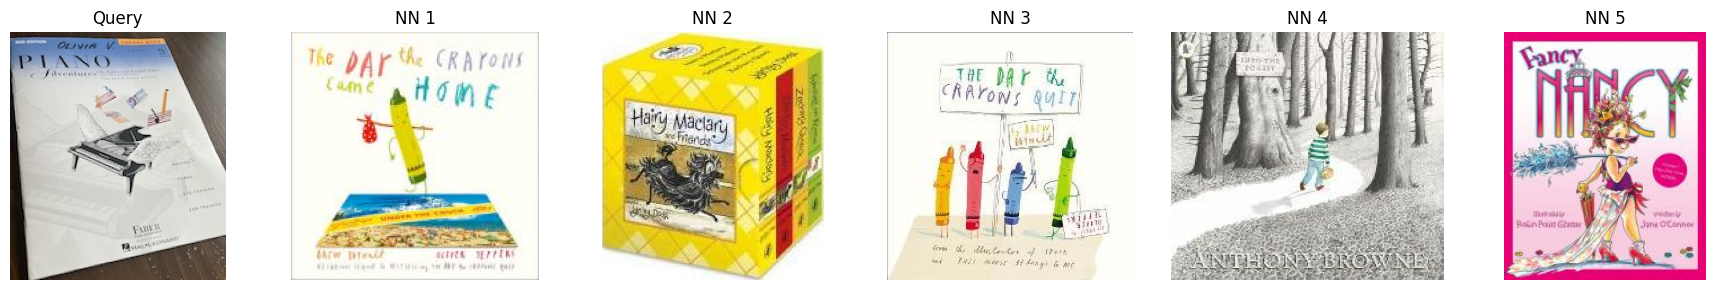

In [ ]:
extraQueries = sorted(glob.glob('extra-queries/*.jpg'))

for qpath in extraQueries:
    # 8. Extract SIFT and convert to visual‐word “document”
    img = io.imread(qpath)
    gray = color.rgb2gray(img)
    sift = SIFT()
    sift.detect_and_extract(gray)
    desc = sift.descriptors
    labels = kmeans.predict(desc) if desc is not None else []
    q_doc = ' '.join(map(str, labels.tolist()))
    
    # 9. Vectorize and find five nearest neighbors
    q_hist = tfidf.transform([q_doc])
    distances, indices = nbrs.kneighbors(q_hist, n_neighbors=5)
    
    # 10. Plot query + its 5 nearest neighbors
    fig, axes = plt.subplots(1, 6, figsize=(18, 3))
    axes[0].imshow(img); axes[0].axis('off'); axes[0].set_title('Query')
    for i, idx in enumerate(indices[0], start=1):
        nn_img = io.imread(paths[idx])
        axes[i].imshow(nn_img)
        axes[i].axis('off')
        axes[i].set_title(f'NN {i}')
    plt.tight_layout()
    plt.show()